# Wasserstein Distance

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

np.set_printoptions(precision=2) # 소수점 2번 째까지 표현

x = np.array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0]) + np.random.rand(6)
y = np.array([1.0, 3.0, 5.0, 7.0, 9.0]) + np.random.rand(5)

np.random.shuffle(x)
np.random.shuffle(y)

print(x)
print(y)

[10.65  4.6   6.54  8.42  2.72  0.55]
[5.96 7.38 9.79 3.89 1.44]


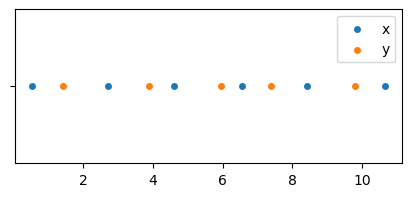

In [2]:
import seaborn as sns

plt.figure(figsize = (5,2))
sns.swarmplot(x=x, label = "x")
sns.swarmplot(x=y, label = "y")
plt.legend()

In [3]:
x_sorted = np.sort(x)
cum_x = (np.arange(len(x)) + 1) / len(x)

print(x_sorted)
print(cum_x)

[ 0.55  2.72  4.6   6.54  8.42 10.65]
[0.17 0.33 0.5  0.67 0.83 1.  ]


In [4]:
y_sorted = np.sort(y)
cum_y = (np.arange(len(y)) + 1) / len(y)

print(y_sorted)
print(cum_y)

[1.44 3.89 5.96 7.38 9.79]
[0.2 0.4 0.6 0.8 1. ]


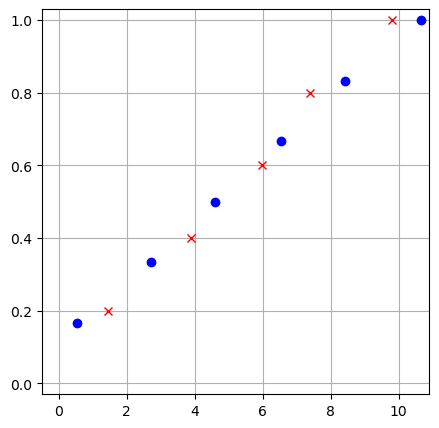

In [5]:
plt.figure(figsize=(5,5))
plt.plot(x_sorted, cum_x, 'bo')
plt.plot(y_sorted, cum_y, 'rx')
plt.grid()
plt.xlim(-0.5, 10.9)
plt.ylim(-0.03, 1.03)
plt.show()

In [6]:
all_values = np.concatenate((x, y))
all_values.sort()
print(all_values)

[ 0.55  1.44  2.72  3.89  4.6   5.96  6.54  7.38  8.42  9.79 10.65]


In [7]:
deltas=np.diff(all_values)
deltas

array([0.89, 1.28, 1.18, 0.71, 1.36, 0.58, 0.84, 1.04, 1.37, 0.85])

In [8]:
# 하지만 이렇게 되면 어떤점이 x에서 왔는지 y에서 왔는지 알 수가 없다.
x_sorted

array([ 0.55,  2.72,  4.6 ,  6.54,  8.42, 10.65])

In [9]:
# all_values에서 x배열에서 온 데이터를 마주칠 때마다 +1을 해준다.
x_cdf_indices = x_sorted.searchsorted(all_values[:-1], 'right')
x_cdf_indices

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype=int64)

In [10]:
# all_values에서 y배열에서 온 데이터를 마주칠 때마다 +1을 해준다.
y_cdf_indices = y_sorted.searchsorted(all_values[:-1], 'right')
y_cdf_indices

array([0, 1, 1, 2, 2, 3, 3, 4, 4, 5], dtype=int64)

In [11]:
x_cdf = x_cdf_indices / len(x)
y_cdf = y_cdf_indices / len(y)

print(all_values[:-1])
print(x_cdf)
print(y_cdf)

[0.55 1.44 2.72 3.89 4.6  5.96 6.54 7.38 8.42 9.79]
[0.17 0.17 0.33 0.33 0.5  0.5  0.67 0.67 0.83 0.83]
[0.  0.2 0.2 0.4 0.4 0.6 0.6 0.8 0.8 1. ]


In [12]:
#계산한 가로 길이 (deltas)와 CDFs (x_cdf, y_cdf)를 사용해서 -Wasserstein distance를 계산해보면 다음과 같다.
p = 1
if p == 1:
    d = np.sum(np.multiply(np.abs(x_cdf - y_cdf), deltas)) 
elif p == 2:
    d = np.sqrt(np.sum(np.multiply(np.square(x_cdf - y_cdf), deltas)))
else: 
    d = np.power(np.sum(np.multiply(np.power(np.abs(x_cdf - y_cdf), p),
                                       deltas)), 1/p)
print(d)

0.9717676936051363


In [13]:
from scipy.stats import wasserstein_distance

print(wasserstein_distance(x, y))

0.9717676936051363


In [ ]:
def _cdf_distance(p, x, y):
    """
    From https://github.com/scipy/scipy/blob/v1.10.1/scipy/stats/_stats_py.py#L9165
    """
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)
    
    all_values = np.concatenate((x, y))
    all_values.sort(kind='mergesort')

    # Compute the differences between pairs of successive values of u and v.
    deltas = np.diff(all_values)

    # Get the respective positions of the values of u and v among the values of
    # both distributions.
    x_cdf_indices = x_sorted.searchsorted(all_values[:-1], 'right')
    y_cdf_indices = y_sorted.searchsorted(all_values[:-1], 'right')

    # Calculate the CDFs of u and v using their weights, if specified.
    x_cdf = x_cdf_indices / x.size
    y_cdf = y_cdf_indices / y.size

    # Compute the value of the integral based on the CDFs.
    # If p = 1 or p = 2, we avoid using np.power, which introduces an overhead
    # of about 15%.
    if p == 1:
        return np.sum(np.multiply(np.abs(x_cdf - y_cdf), deltas))
    if p == 2:
        return np.sqrt(np.sum(np.multiply(np.square(x_cdf - y_cdf), deltas)))
    return np.power(np.sum(np.multiply(np.power(np.abs(x_cdf - y_cdf), p),
                                       deltas)), 1/p)

# 2-Dimension Wasserstein

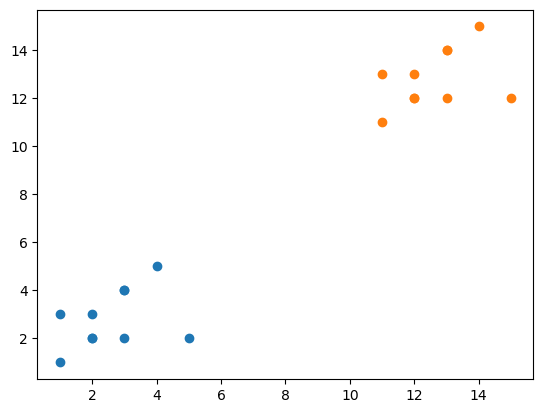

In [36]:
x1 = [1,2,2,3,4,3,1,2,5,3]
y1 = [1,2,3,4,5,4,3,2,2,2]

x2 = [11,12,12,13,14,13,11,12,15,13]
y2 = [11,12,13,14,15,14,13,12,12,12]

plt.scatter(x = x1, y = y1)
plt.scatter(x = x2, y = y2)

In [37]:
from scipy.stats import wasserstein_distance

x1 = [1, 2, 2, 3, 4, 3, 1, 2, 5, 3]
y1 = [1, 2, 3, 4, 5, 4, 3, 2, 2, 2]
a = [x1,y1]

x2 = [11, 12, 12, 13, 14, 13, 11, 9, 10, 13]
y2 = [11, 12, 13, 14, 15, 14, 13, 12, 12, 9]
b = [x2,y2]

w1=wasserstein_distance(a[0],b[0])
w2=wasserstein_distance(a[1],b[1])

print(w1,w2)

9.200000000000001 9.7


In [38]:
w1+w2

18.9